<a href="https://colab.research.google.com/github/MUMADE-TADM/s1_python-gercevas/blob/main/Copia_de_TADM2022_2a_Razonamiento_Borroso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Sistema Borroso
 

Vamos a crear un sistema de control borroso que modela cómo se puede evaluar la capacidad de un cliente para pedir un préstamo. Cuando se tiene que dar un préstamos se considerará la edad del peticionario, la cantidad del préstamos, la duración y los pagos en los que se divide. FInalmente nos dará una puntuación de 0 a 10 al préstamo. 


## Preliminares

https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html#example-plot-tipping-problem-newapi-py

* instalación de scikit-fuzzy

In [ ]:
# https://pythonhosted.org/scikit-fuzzy/
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 4.9 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=dc7646f726ad878c0c7e5c493133e0db0fff63ced1c2c6ee20dcee8602451e62
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


* importación de librerías


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

##  Sistema Borroso

Definimos los Antecedentes
* Edad del cliente
* pagos mensuales
* Cantidad del Préstamo
* Duración de la Amortización (min: 12 max 60)



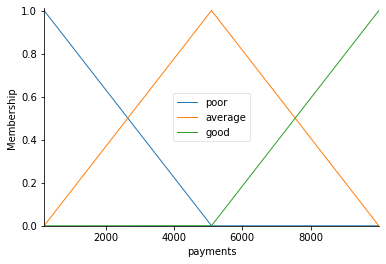

In [ ]:
# nombre: 'payments'
# rango/dominio: np.arange(200, 10000, 1)
payments = ctrl.Antecedent(np.arange(200, 10000, 1), 'payments')
payments.automf(3) # número de etiquetas
payments.view()

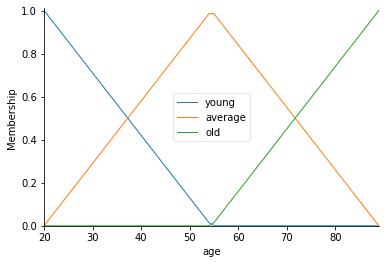

In [ ]:
age = ctrl.Antecedent(np.arange(20,90, 1), 'age')
age.automf(3, names = ["young", "average", "old"])
age.view()

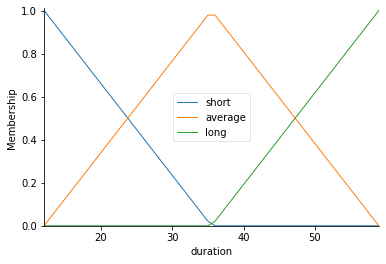

In [ ]:
duration = ctrl.Antecedent(np.arange(12, 60, 1), 'duration')
duration.automf(3, names=["short", "average", "long"])
duration.view()

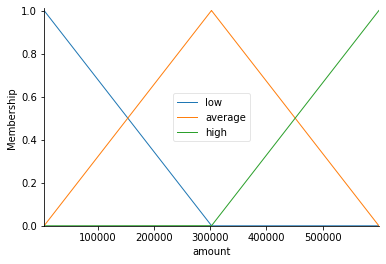

In [ ]:
amount = ctrl.Antecedent(np.arange(5000, 600000, 1), 'amount')
amount.automf(3,  names = ["low","average","high"])
amount.view()

Definimos el consecuente

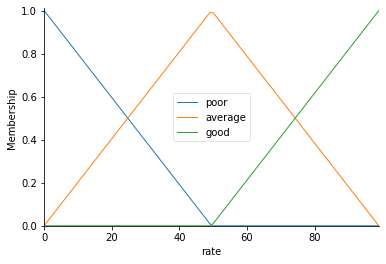

In [ ]:
rate = ctrl.Consequent(np.arange(0, 100, 1), 'rate')
rate.automf(3)
rate.view()


## Reglas borrosas
-----------
Ahora, para hacer estos triángulos útiles, definimos la *relación borrosa*
entre las variables de entrada y salida. Para el ejemplo vamos a considerar las siguientes reglas simples (para hacer un sistema completo se necesitarían algunas más) 

1. Si la duración y la cantidad son pequeñas entonces la calificación será buena.
2. Si la cantidad es alta, los pagos pequeños y la duración alta entonces la calificación será *pobre*
3. Si la cantidad es media y los pagos también medios si la edad del cliente es baja entonces el rating es medio. 

La clave de estas reglas es que son borrosas, es decir que expresamos la información de forma lingüística intentando manejar la incertidumbre inherente. 



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9002082310>)

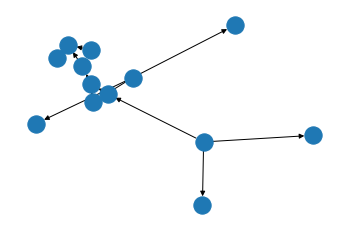

In [ ]:
rule1 = ctrl.Rule(duration['short'] & amount['low'], rate['good'])
rule2 = ctrl.Rule(amount['high'] & payments['average'] & duration["long"], rate["poor"])
rule3 = ctrl.Rule(age['young'] & amount['average'], rate['average'])

rule1.view()

Ahora que tenemos nuestras reglas definidas, podemos simplemente crear un sistema de control vía:

In [ ]:
rating_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
rating_ctrl.graph

Con el fin de simular este sistema de control, crearemos un
"Sistema de Control y Simulación".  Este objeto que representa al controlador aplicado a un conjunto específico de circunstancias.  

In [ ]:
rating = ctrl.ControlSystemSimulation(rating_ctrl)

Ahora podemos simular nuestro sistema de control simplemente especificando las entradas y llamando al método *compute*.  

Supongamos que un cliente de 40 años va a pedir un préstamos a 12 años con pagos de 2000 y una cantidad de 300000

In [ ]:
rating.input['age'] = 30
rating.input['duration'] = 60
rating.input['payments'] = 2000
rating.input['amount'] = 500000


En este caso, al ser el importe más alto, la puntuación para otorgar préstamos aumentará.

44.52999446644107


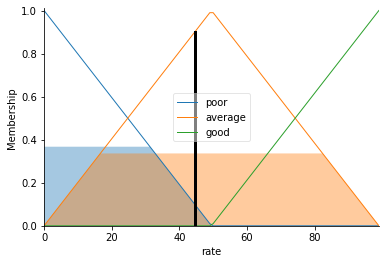

In [ ]:
rating.compute()
print(rating.output['rate'])
rate.view(sim=rating)

Al bajar el valor del importe, se observa que la puntuación será ideal al obtener un préstamo para los clientes de la diferente segmentación poor, average and good.

48.965319518783154


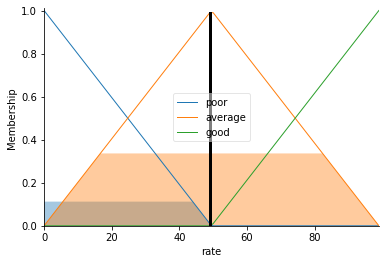

In [ ]:
rating.input['age'] = 30
rating.input['duration'] = 60
rating.input['payments'] = 750
rating.input['amount'] = 500000
rating.compute()
print(rating.output['rate'])
rate.view(sim=rating)

Al observarlo por la edad. Si aumentamos la edad, la puntuación a la hora de obtener un préstamo para el cliente, en este caso 50 años, será menor.

35.84447618067917


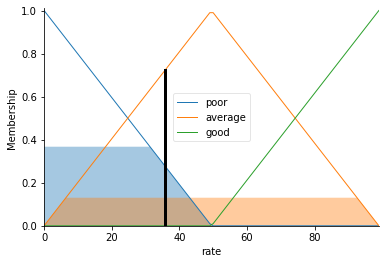

In [ ]:
rating.input['age'] = 50
rating.input['duration'] = 60
rating.input['payments'] = 2000
rating.input['amount'] = 500000
rating.compute()
print(rating.output['rate'])
rate.view(sim=rating)

Sin embargo, al tener menos de 30 años la puntuación es menor que si tuviera 30. No obstante, es mayor en comparación a clientes con la edad de 50. Esto se puede deber a factores como estabilidad laboral o experiencia laboral.

44.52999446644107


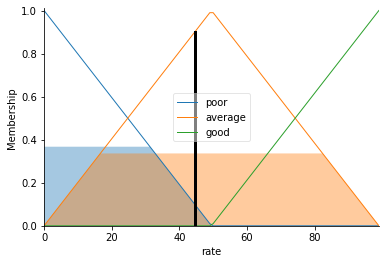

In [ ]:
rating.input['age'] = 25
rating.input['duration'] = 60
rating.input['payments'] = 2000
rating.input['amount'] = 500000
rating.compute()
print(rating.output['rate'])
rate.view(sim=rating)

Al analizar, la variable duración se observa que mientras menor sea la duración, mayor es la puntuación.

49.499999999999964


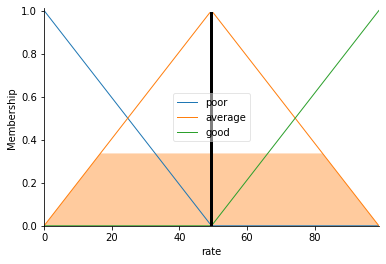

In [ ]:
rating.input['age'] = 30
rating.input['duration'] = 30
rating.input['payments'] = 2000
rating.input['amount'] = 500000
rating.compute()
print(rating.output['rate'])
rate.view(sim=rating)

Por último, se analizará la varibale cantidad. El préstamos al no ser una gran suma de dinero, el cliente tendrá una puntuación mayor. Es decir, mientras más dinero se pida, la puntuación será menor para el cliente. Sin embargo, se debe tomar en cuanto todas las variables para un análisis conjunto y así determinar su puntuación debido a que si la suma de dinero es grande y la duración también, 



50.877546822834425


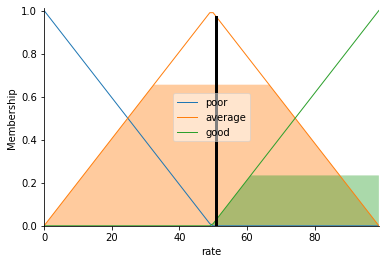

In [ ]:
rating.input['age'] = 30
rating.input['duration'] = 30
rating.input['payments'] = 2000
rating.input['amount'] = 200000
rating.compute()
print(rating.output['rate'])
rate.view(sim=rating)

49.500000000000014


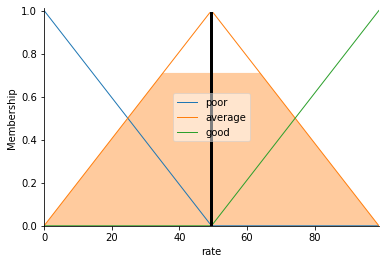

In [ ]:
rating.input['age'] = 30
rating.input['duration'] = 60
rating.input['payments'] = 2000
rating.input['amount'] = 250000
rating.compute()
print(rating.output['rate'])
rate.view(sim=rating)